## Генераторы в networkx

Пакет networkx включает в себя функции создания графов различных конфигураций. Многие из них не имеют особого отношения к интересующим нас структурам графов контактов, но некоторые из них могут быть полезны. В общем, лучше всего точно адаптировать определение сети к интересующей вас группе, но готовые генераторы networkx могут быть полезны для быстрого изучения.

### LFR Networks

Алгоритм LFR генерирует графы с известной структурой сообщества и широким (примерно колоколообразным) распределением степеней с экспоненциальным правым хвостом. Что касается стандартного генератора, сеть LFR находится в пределах приблизительной.

Предостережения: сети LFR обычно имеют очень низкую ассортативность и транзитивность, которые являются важными характеристиками многих реальных графов контактов. Кроме того, реализация алгоритма LFR в функции генератора networkx имеет известную ошибку, которая иногда проявляется.

LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=None, min_degree=None, max_degree=None, min_community=None, max_community=None, tol=1e-07, max_iters=500, seed=None)

- n (int) – Number of nodes in the created graph.
- tau1 (float) – Power law exponent for the degree distribution of the created graph. This value must be strictly greater than one.
- tau2 (float) – Power law exponent for the community size distribution in the created graph. This value must be strictly greater than one.
- mu (float) – Fraction of intra-community edges incident to each node. This value must be in the interval [0, 1].
- average_degree (float) – Desired average degree of nodes in the created graph. This value must be in the interval [0, n]. Exactly one of this and min_degree must be specified, otherwise a NetworkXError is raised.
- min_degree (int) – Minimum degree of nodes in the created graph. This value must be in the interval [0, n]. Exactly one of this and average_degree must be specified, otherwise a NetworkXError is raised.
- max_degree (int) – Maximum degree of nodes in the created graph. If not specified, this is set to n, the total number of nodes in the graph.
- min_community (int) – Minimum size of communities in the graph. If not specified, this is set to min_degree.
- max_community (int) – Maximum size of communities in the graph. If not specified, this is set to n, the total number of nodes in the graph.
- tol (float) – Tolerance when comparing floats, specifically when comparing average degree values.
- max_iters (int) – Maximum number of iterations to try to create the community sizes, degree distribution, and community affiliations.
- seed (int) – A seed for the random number generator.

In [19]:
!pip install --upgrade networkx

     |████████████████████████████████| 1.6 MB 1.6 MB/s eta 0:00:01
  Attempting uninstall: networkx
    Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4


In [2]:
import matplotlib.pyplot as mplt
import networkx as nx

In [3]:
from networkx.generators.community import LFR_benchmark_graph
n = 250
tau1 = 3 #Power law exponent for the degree distribution of the created graph. 
tau2 = 1.5 #Power law exponent for the community size distribution in the created graph.
mu = 0.05 #Fraction of intra-community edges incident to each node. 
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10)

In [4]:
communities = {frozenset(G.nodes[v]['community']) for v in G}
communities

{frozenset({3,
            7,
            13,
            14,
            20,
            23,
            24,
            27,
            28,
            29,
            31,
            36,
            37,
            39,
            40,
            46,
            54,
            55,
            58,
            63,
            65,
            69,
            72,
            75,
            76,
            78,
            82,
            83,
            85,
            89,
            90,
            93,
            105,
            106,
            114,
            117,
            118,
            122,
            124,
            125,
            127,
            129,
            133,
            134,
            136,
            142,
            144,
            153,
            157,
            158,
            162,
            167,
            168,
            169,
            173,
            175,
            178,
            180,
            182,
            184,
            19

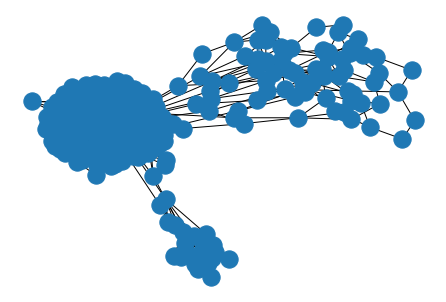

In [5]:
nx.draw(G)
mplt.show()

### Barabasi-Albert (BA) Networks

**Безмасштабная сеть** или масштабно-инвариантная сеть (англ. scale-free network) — граф, в котором степени вершин распределены по степенному закону, то есть доля вершин со степенью $k$ примерно или асимптотически пропорциональна $k^{-\gamma }$

Эмпирически было установлено, что многие естественно возникающие сети — социальные, коммуникационные, биологические, графы цитирований, ссылок в WWW, и другие системы — хорошо моделируются безмасштабными графами.

<img width=600 src="scale.png">

**Модель Барабаши-Альберт (БА)** — алгоритм генерации случайных безмасштабных сетей с использованием принципа предпочтительного присоединения. 
Она включает в себя две важные общие концепции:

- рост сети
- принцип предпочтительного присоединения (ПП)

Обе концепции широко представлены в сетях реального мира. Рост значит, что число узлов сети увеличивается со временем.

Принцип предпочтительного присоединения заключается в том, что чем больше связей имеет узел, тем более предпочтительно для него создание новых связей. Узлы с наибольшей степенью имеют больше возможностей забирать себе связи, добавляемые в сеть. Интуитивно, принцип предпочтительно присоединения может быть понят, если мы думаем в терминах социальных сетей, которые объединяют людей. Здесь связь от А к B значит, что человек A «знает» или «знаком» с человеком B. Сильно связанные узлы представлены известными людьми с большим числом связей. Когда новичок попадает в сообщество, для него/неё более предпочтительно связаться с одним из известных людей, чем с относительно неизвестным. Подобным образом во всемирной сети страницы связываются с хабами, к примеру, с хорошо известными сайтами, как Гугл или Википедия, чем со страницами, которые мало кому известны. Если выбирать для связи новую страницу случайным образом, то вероятность выбора определённой страницы будет пропорциональна её степени. Это объясняет принцип предпочтительного присоединения.

Принцип предпочтительно присоединения — пример положительной обратной связи, где изначально случайные вариации (один узел изначально имеет больше ссылок или начинает собирать ссылки раньше других) автоматически усиливаются, тем самым значительно увеличивая разрыв. Это также иногда называют эффектом Матфея, «богатые становятся богаче», или автокатализом в химии.

https://ru.wikipedia.org/wiki/Модель_Барабаши_—_Альберт

In [ ]:
barabasi_albert_graph(n, m, seed=None)

 - n : int   Number of nodes

 - m : int   Number of edges to attach from a new node to existing nodes

 - seed : int, optional  Seed for random number generator (default=None).

In [9]:
from networkx.generators.random_graphs import barabasi_albert_graph

In [10]:
n=50
m=3
G=barabasi_albert_graph(n, m, seed=None)

In [46]:
G

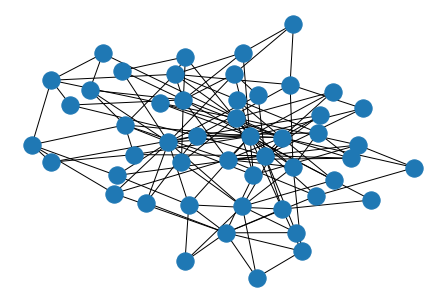

In [11]:
nx.draw(G)
mplt.show()

## Генераторы в SEIRS+ 

### FARZ Networks

Алгоритм FARZ генерирует сети со встроенной структурой сообществ и широкими распределениями с тяжелыми хвостами для степени узлов и размеров сообществ. Алгоритм FARZ имеет параметры для средней степени, количества сообществ, силы структуры сообщества, транзитивности, ассортативности (степени корреляции) и распределения размеров сообщества. Возможность настройки этих свойств делает генератор FARZ привлекательным методом создания контактных сетей для использования с SEIRS +.

<table role="table">
<thead>
<tr>
<th>Parameter</th>
<th>Description</th>
<th>Data Type</th>
</tr>
</thead>
<tbody>
<tr>
<td>n</td>
<td>number of nodes</td>
<td>REQUIRED</td>
</tr>
<tr>
<td>m</td>
<td>number of edges created per node</td>
<td>REQUIRED</td>
</tr>
<tr>
<td>k</td>
<td>number of communities</td>
<td>REQUIRED</td>
</tr>
<tr>
<td>beta</td>
<td>probability of edges formation within communities, rather than between (strength of community structure)</td>
<td><code>0.8</code></td>
</tr>
<tr>
<td>alpha</td>
<td>strength of common neighbor's effect on edge formation (tunes transitivity, clustering)</td>
<td><code>0.5</code></td>
</tr>
<tr>
<td>gamma</td>
<td>strength of degree similarity effect on edge formation (tunes assortativity)</td>
<td><code>0.5</code></td>
</tr>
<tr>
<td>r</td>
<td>maximum number of communities each node can belong to</td>
<td><code>1</code></td>
</tr>
<tr>
<td>q</td>
<td>probability of a node belonging to the multiple communities</td>
<td><code>0.5</code></td>
</tr>
<tr>
<td>phi</td>
<td>constant added to all community sizes, higher number makes the communities more balanced in size, <code>1</code> results in power law community size distribution</td>
<td><code>10</code></td>
</tr>
<tr>
<td>epsilon</td>
<td>probability of noisy/random edges</td>
<td><code>0.0000001</code></td>
</tr>
<tr>
<td>t</td>
<td>probability of also connecting to the neighbors of a node each nodes connects to (tunes transitivity, clustering)</td>
<td><code>0</code></td>
</tr>
</tbody>
</table>

### Demographic Community Network

<img width=600 src="demographic_community_network.png">

In [25]:
household_data = {
                   'age_distn':{'0-9': 0.121, '10-19': 0.131, '20-29': 0.137, '30-39': 0.133, '40-49': 0.124, '50-59': 0.131, '60-69': 0.115, '70-79': 0.070, '80+'  : 0.045  },
                   'household_size_distn':{ 1: 0.284, 2: 0.345, 3: 0.151, 4: 0.128, 5: 0.058, 6: 0.023, 7: 0.011 },
                   'household_stats':{ 'pct_with_under20': 0.337,                      # percent of households with at least one member under 60
                                       'pct_with_over60': 0.380,                       # percent of households with at least one member over 60
                                       'pct_with_under20_over60':  0.034,              # percent of households with at least one member under 20 and at least one member over 60
                                       'pct_with_over60_givenSingleOccupant': 0.110,   # percent of households with a single-occupant that is over 60
                                       'mean_num_under20_givenAtLeastOneUnder20': 1.91 # number of people under 20 in households with at least one member under 20
                                     }
                 }

In [ ]:
layer_info  = { '0-9':   {'ageBrackets': ['0-9'],   'meanDegree': 8.6,  'meanDegree_CI': (0.0, 17.7) },
                '10-19': {'ageBrackets': ['10-19'], 'meanDegree': 16.2, 'meanDegree_CI': (12.5, 19.8) },
                '20-59': {'ageBrackets': ['20-29', '30-39', '40-49', '50-59'], 'meanDegree': ((age_distn_given20to60['20-29']+age_distn_given20to60['30-39'])*15.3 + (age_distn_given20to60['40-49']+age_distn_given20to60['50-59'])*13.8), 'meanDegree_CI': ( ((age_distn_given20to60['20-29']+age_distn_given20to60['30-39'])*12.6 + (age_distn_given20to60['40-49']+age_distn_given20to60['50-59'])*11.0), ((age_distn_given20to60['20-29']+age_distn_given20to60['30-39'])*17.9 + (age_distn_given20to60['40-49']+age_distn_given20to60['50-59'])*16.6) ) },
                '60+':   {'ageBrackets': ['60-69', '70-79', '80+'], 'meanDegree': 13.9, 'meanDegree_CI': (7.3, 20.5) } 
              }

**generate_demographic_contact_network()**

<table role="table">
<thead>
<tr>
<th>Argument</th>
<th>Description</th>
<th>Data Type</th>
<th>Default Value</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>N</code></td>
<td>total number of nodes in the population</td>
<td><code>int</code></td>
<td>REQUIRED</td>
</tr>
<tr>
<td><code>demographic_data</code></td>
<td>dictionary specifying age and household composition distributions<br><em>See <a href="#demographic-calibration">Demographic calibration</a> for more info</em>
</td>
<td><code>dict</code></td>
<td>REQUIRED</td>
</tr>
<tr>
<td><code>layer_generator</code></td>
<td>The algorithm to use in generating in network layer (<a href="#farz-networks"><code>'FARZ'</code></a> or <a href="#lfr-networks">'<code>LFR'</code></a>
</td>
<td><code>string</code></td>
<td><code>'FARZ'</code></td>
</tr>
<tr>
<td><code>layer_info</code></td>
<td>dictionary specifying the age groups and mean degree targets for each network layer<br><em>See <a href="#layer-defintions">Layer definitions</a> for more info</em>
</td>
<td><code>dict</code></td>
<td>
<code>None</code><br>*(use default layers)</td>
</tr>
<tr>
<td><code>distancing_scales</code></td>
<td>list of social distancing scales for which versions of the network should be returned <br><em>See <a href="#social-distancing">Social distancing</a> for more info</em>
</td>
<td><code>list</code></td>
<td><code>[]</code></td>
</tr>
<tr>
<td><code>isolation_groups</code></td>
<td>list of age groups for which a version of the network should be returned with their out-of-household edges removed<br><em>See <a href="#age-group-isolation">Age group isolation</a> for more info</em>
</td>
<td><code>list</code></td>
<td><code>[]</code></td>
</tr>
</tbody>
</table>

<table role="table">
<thead>
<tr>
<th>Returned</th>
<th>Description</th>
<th>Data Type</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>graphs</code></td>
<td>list of graphs (networks) generated, includes baseline network always, includes distancing and/or age group isolation versions as applicable</td>
<td>list of <code>networkx Graph</code> objects</td>
</tr>
<tr>
<td><code>individualAgeBracketLabels</code></td>
<td>list of the age groups assigned to each of the <code>N</code> nodes</td>
<td>
<code>list</code> of <code>strings</code>
</td>
</tr>
<tr>
<td><code>households</code></td>
<td>list of lists giving the node IDs for each household</td>
<td>
<code>list</code> of <code>lists</code> of <code>ints</code>
</td>
</tr>
</tbody>
</table>

In [18]:
! pip install seirsplus

     |████████████████████████████████| 64 kB 77 kB/s eta 0:00:011
  Created wheel for seirsplus: filename=seirsplus-1.0.9-py3-none-any.whl size=64633 sha256=73f915c67e31c7ed28fe7a2e9d28a1aced3f3e978f5ccadea6c4f49f6d3f09ba
  Stored in directory: /Users/zukhbaanastasiya/Library/Caches/pip/wheels/23/8f/4f/04f0d234e0258559a69487b9f73b0518930a3c3586c32003e0
Successfully built seirsplus


In [28]:
from seirsplus.networks import *

In [50]:
grlist,age,house = generate_demographic_contact_network(1000, demographic_data=household_data, layer_generator='LFR', layer_info=None)

Generated overall age distribution:
0-9: 0.1070	(-0.0140 from target)
10-19: 0.1180	(-0.0130 from target)
20-29: 0.1400	(0.0030 from target)
30-39: 0.1260	(-0.0070 from target)
40-49: 0.1130	(-0.0110 from target)
50-59: 0.1480	(0.0170 from target)
60-69: 0.1180	(0.0030 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0580	(0.0130 from target)

Generated household size distribution:
1: 0.2571	(-0.0269 from target)
2: 0.3429	(-0.0021 from target)
3: 0.1325	(-0.0185 from target)
4: 0.1403	(0.0123 from target)
5: 0.0831	(0.0251 from target)
6: 0.0286	(0.0056 from target)
7: 0.0156	(0.0046 from target)
Num households: 385
mean household size: 2.444

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [51]:
grlist['baseline']

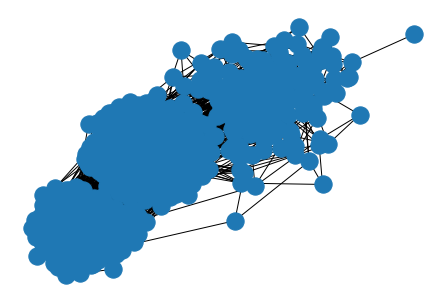

In [52]:
nx.draw(grlist['baseline'])
mplt.show()

### Workplace Network

<img width=600 src="workplace_network.png">

**generate_workplace_contact_network()**

<table role="table">
<thead>
<tr>
<th>Argument</th>
<th>Description</th>
<th>Data Type</th>
<th>Default Value</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>num_cohorts</code></td>
<td>number of cohort layers to generate</td>
<td><code>int</code></td>
<td><code>1</code></td>
</tr>
<tr>
<td><code>num_nodes_per_cohort</code></td>
<td>number of nodes per cohort<br><em>number of nodes per FARZ layer, <a href="#farz-parameters">FARZ param</a> <code>n</code></em><br><em>(can provide single value to use in all cohorts or list of values for each cohort)</em>
</td>
<td>
<code>int</code> or <code>list</code>
</td>
<td><code>100</code></td>
</tr>
<tr>
<td><code>num_teams_per_cohort</code></td>
<td>number of teams per cohort<br><em>number of communities per FARZ layer, <a href="#farz-parameters">FARZ param</a> <code>k</code></em><br><em>(can provide single value to use in all cohorts or list of values for each cohort)</em>
</td>
<td>t</td>
<td><code>10</code></td>
</tr>
<tr>
<td><code>mean_intracohort_degree</code></td>
<td>mean number of within cohort contacts per individual<br><em>mean degree per FARZ layer, <a href="#farz-parameters">FARZ param</a> <code>m</code><br></em>(can provide single value to use in all cohorts or list of values for each cohort)*</td>
<td>t</td>
<td><code>6</code></td>
</tr>
<tr>
<td><code>pct_contacts_intercohort</code></td>
<td>percentage of each employee's total workplace contacts (total degree) that are inter-cohort interactions</td>
<td><code>float</code></td>
<td><code>0.2</code></td>
</tr>
<tr>
<td><code>farz_params</code></td>
<td>dictionary specifying <a href="#farz-parameters">parameters for the FARZ network generator</a>, other than params <code>n</code>, <code>k</code>, and <code>m</code> which are given by the arguments above<br>default: <code>{'alpha':5.0, 'gamma':5.0, 'beta':0.5, 'r':1, 'q':0.0, 'phi':1, 'b':0, 'epsilon':1e-6}</code>
</td>
<td><code>dict</code></td>
<td>see left</td>
</tr>
<tr>
<td><code>distancing_scales</code></td>
<td>list of social distancing scales for which versions of the network should be returned <br><em>See <a href="#distancing">Social distancing</a> for more info</em>
</td>
<td><code>list</code></td>
<td><code>[]</code></td>
</tr>
</tbody>
</table>

<table role="table">
<thead>
<tr>
<th>Returned</th>
<th>Description</th>
<th>Data Type</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>workplaceNetwork</code></td>
<td>dictionary of graphs (networks) generated, includes baseline network always, includes distancing and/or age group isolation versions as applicable</td>
<td>
<code>dict</code> of <code>networkx Graph</code> objects</td>
</tr>
<tr>
<td><code>cohorts_indices</code></td>
<td>list of lists giving the node IDs belonging to each cohort</td>
<td>
<code>list</code> of <code>lists</code> of <code>ints</code>
</td>
</tr>
<tr>
<td><code>teams_indices</code></td>
<td>list of lists giving the node IDs belonging to each team</td>
<td>
<code>list</code> of <code>lists</code> of <code>ints</code>
</td>
</tr>
</tbody>
</table>

In [107]:
workp,co,teams = generate_workplace_contact_network(num_cohorts=4)

In [108]:
workp

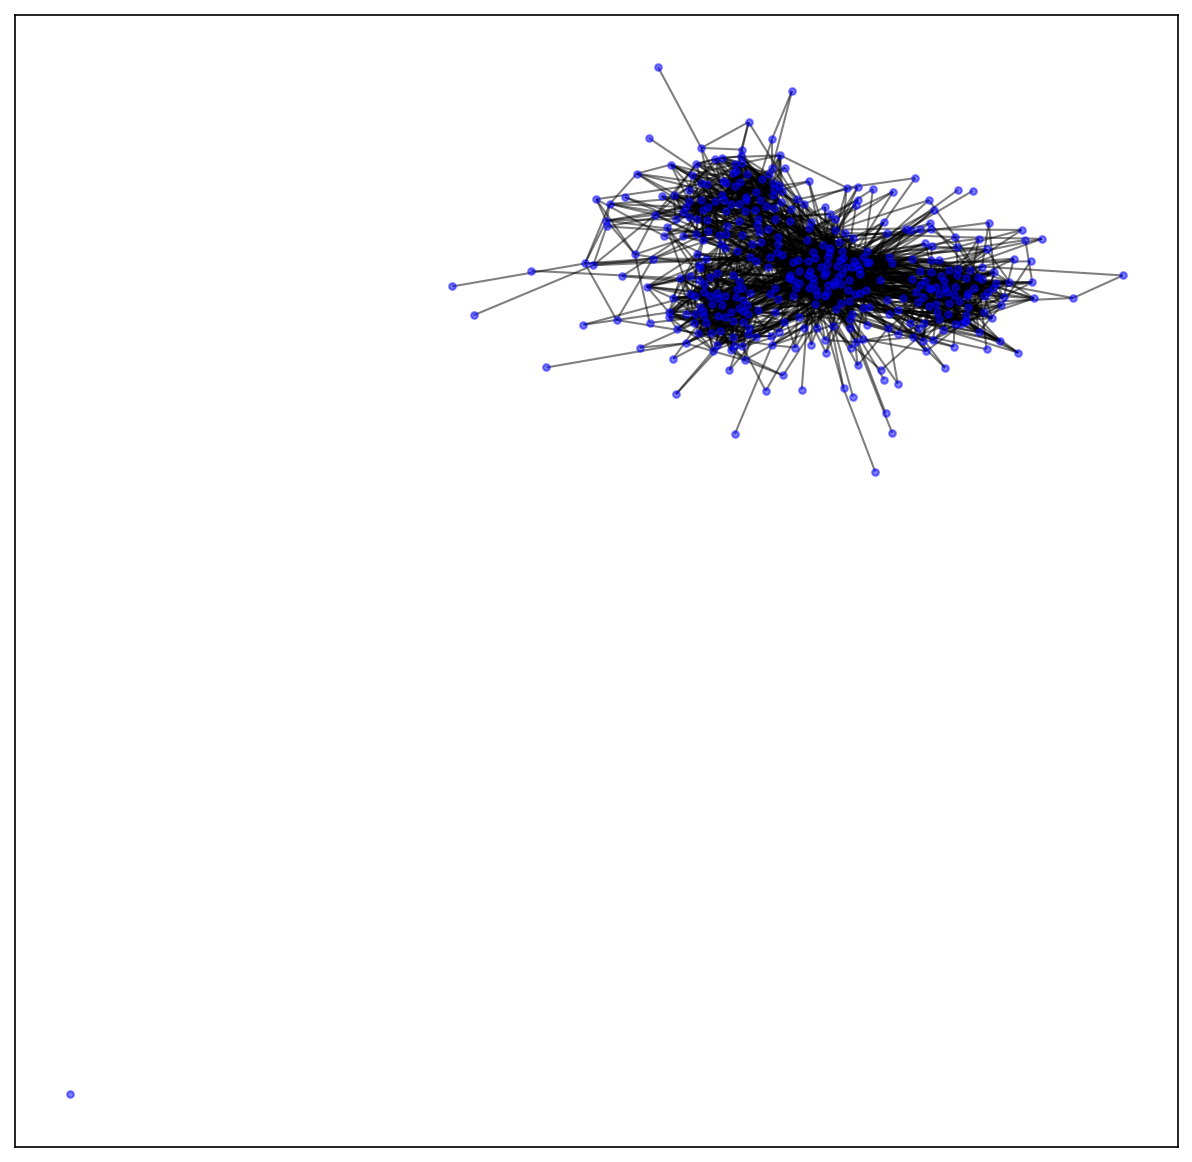

In [109]:
nx.draw_networkx(workp, with_labels=False, node_color="blue", alpha= 0.5, node_size=10)
mplt.rcParams['figure.figsize'] = (10.0,10.0)
mplt.rcParams['figure.dpi'] = 150
mplt.show()

### Социальное дистанцирование: custom_exponential_graph() function

Эта функция определяет механизм отсечения ребер, который возвращает измененную версию графа, в которой было удалено подмножество исходных ребер.

**Алгоритм**

Для каждого узла:
- Подсчитать количество соседей узла $N$
- Получить случайное число $R$ из экспоненциального распределения с некоторым средним значением $M$. Если $R> N$, установите $R = N$.
- Случайным образом выбрать $R$ из соседей этого узла, удалите ребра для всех остальных соседей.

В результате получается сеть, набор ребер которой является подмножеством ребер исходной сети, и где средняя степень была уменьшена.

Этот метод полезен для создания версий базовой контактной сети для карантина или социального дистанцирования.

<table role="table">
<thead>
<tr>
<th>Argument</th>
<th>Description</th>
<th>Data Type</th>
<th>Default Value</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>base_graph</code></td>
<td>the base graph that is to be modified <br>*(if <code>None</code> provided, this function will generate a <a href="#barabasi-albert-ba-networks">BA network</a> as a starting point using to the optional <code>m</code> and <code>n</code> arguments</td>
<td>
<code>networkx Graph</code> object</td>
<td><code>None</code></td>
</tr>
<tr>
<td><code>scale</code></td>
<td>the scale (mean) of the exponential distribution used in the edge pruning method (denoted <em>M</em> above). The smaller the scale, the more edges are pruned.</td>
<td><code>int</code></td>
<td><code>100</code></td>
</tr>
<tr>
<td><code>min_num_edges</code></td>
<td>A minimum number of edges to ensure all nodes are left with after pruning</td>
<td><code>int</code></td>
<td><code>0</code></td>
</tr>
<tr>
<td><code>m</code></td>
<td>the <em>m</em> argument of the <code>networkx</code> <a href="#barabasi-albert-ba-networks">BA network</a> generator (only relevant if no <code>base_graph</code> provided</td>
<td><code>int</code></td>
<td><code>9</code></td>
</tr>
<tr>
<td><code>n</code></td>
<td>the size (num nodes) of the <code>networkx</code> <a href="#barabasi-albert-ba-networks">BA network</a> to be generated (only relevant if no <code>base_graph</code> provided</td>
<td><code>int</code></td>
<td><code>None</code></td>
</tr>
</tbody>
</table>